In [1]:
import torch
from torch.distributions import Beta, Bernoulli, Categorical

In [2]:
def sample_prior(num_samples, num_features, c, s_d, s_l):
  # sample latents
  z = torch.zeros(num_samples).long()
  M_k = []
  for t in range(num_samples):
    z_probs = torch.zeros(len(M_k)+1)
    z_probs[-1] = (1-c) / ((1-c) + c*t)
    z_probs[:-1] = (c * torch.Tensor(M_k)) / ((1-c) + c*t)

    z[t] = Categorical(z_probs).sample()

    if z[t] == len(M_k):
      M_k.append(1)
    else:
      M_k[z[t]] += 1

  # sample feature and class probs
  x_probs = Beta(s_d * torch.ones(z.max()+1, num_features), s_d * torch.ones(z.max()+1, num_features)).sample()
  y_probs = Beta(s_l * torch.ones(z.max()+1), s_l * torch.ones(z.max()+1)).sample() 

  # sample feature and class values
  x = Bernoulli(x_probs[z]).sample()
  y = Bernoulli(y_probs[z]).sample()
  return x, y

In [12]:
x, y = sample_prior(10, 3, 0.318, 0.488, 0.046)
print(x.shape)
print(y.shape)

torch.Size([10, 3])
torch.Size([10])


In [13]:
x

tensor([[1., 1., 0.],
        [1., 1., 1.],
        [0., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 1.],
        [1., 0., 0.],
        [0., 1., 1.],
        [0., 0., 1.]])

In [14]:
y

tensor([0., 1., 0., 0., 1., 0., 1., 1., 0., 0.])

In [7]:
import sys
sys.path.append('/raven/u/ajagadish/vanilla-llama/categorisation/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
FONTSIZE=15

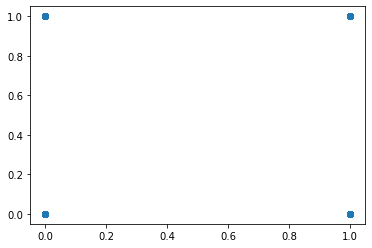

In [8]:
plt.scatter(x[:,0], x[:,1])